In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture 
import numpy as np

In [2]:
df = pd.read_csv('../model/nearest_nightlights_per_city.csv')
df

,city_code,city,uf,lat,long,radiance,geometry,distance_to_city,rank
0,1101450,Parecis,RO,-12.158334,-61.604166,0.235929,POINT (-61.6041657195 -12.158334030600004),0.022360,89.0
1,1101450,Parecis,RO,-12.158334,-61.599999,0.252750,POINT (-61.5999990528 -12.158334030600004),0.021586,83.0
2,1101450,Parecis,RO,-12.158334,-61.595832,0.253744,POINT (-61.5958323861 -12.158334030600004),0.021602,85.0
3,1101450,Parecis,RO,-12.158334,-61.591666,0.231304,POINT (-61.5916657194 -12.158334030600004),0.022406,90.0
4,1101450,Parecis,RO,-12.162501,-61.612499,0.235071,POINT (-61.61249905289999 -12.162500697300004),0.022594,91.0
...,...,...,...,...,...,...,...,...,...
13995,5204250,Cachoeira Dourada,GO,-18.508334,-49.470832,1.707905,POINT (-49.4708322891 -18.508334081400008),0.019299,67.0
13996,5204250,Cachoeira Dourada,GO,-18.508334,-49.466666,1.696757,POINT (-49.4666656224 -18.508334081400008),0.019761,72.0
13997,5204250,Cachoeira Dourada,GO,-18.508334,-49.462499,1.550770,POINT (-49.4624989557 -18.508334081400008),0.021055,81.0
13998,5204250,Cachoeira Dourada,GO,-18.508334,-49.458332,0.853822,POINT (-49.458332289 -18.508334081400008),0.023040,98.0


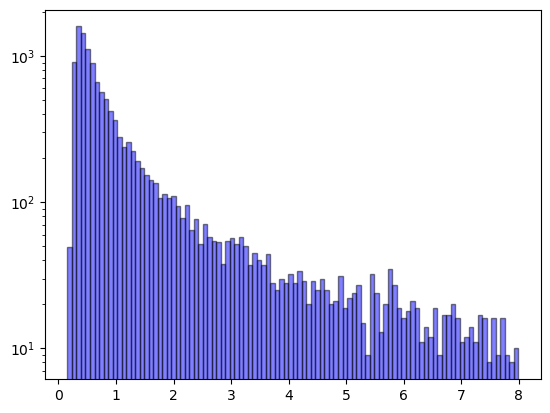

In [85]:
filtered = df[df['radiance'] < 8]

num_bins = 100
plt.hist(filtered['radiance'], bins=num_bins, alpha=0.5, color='b', edgecolor='black')
plt.yscale('log')

In [74]:
p25 = df['radiance'].quantile(0.25)
p33 = df['radiance'].quantile(0.3333)
p50 = df['radiance'].quantile(0.5)
p66 = df['radiance'].quantile(0.6666)
p75 = df['radiance'].quantile(0.75)
print('p25 => ', p25)
print('p33 => ', p33)
print('p50 => ', p50)
print('p66 => ', p66)
print('p75 => ', p75)

p25 =>  0.439796475
p33 =>  0.516268992402
p50 =>  0.750780325
p66 =>  1.2648520526999998
p75 =>  1.8567108749999999


Text(1.656710875, 2200, '1.86')

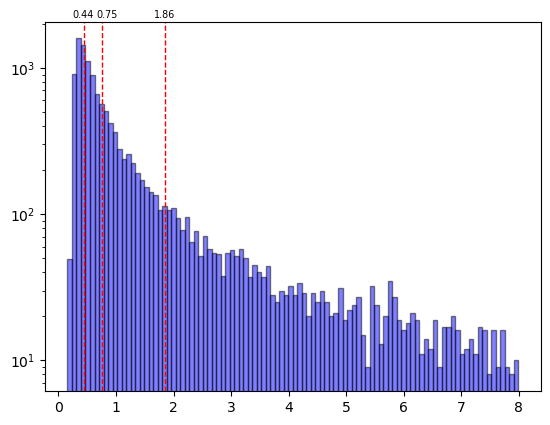

In [86]:
num_bins = 100
plt.hist(filtered['radiance'], bins=num_bins, alpha=0.5, color='b', edgecolor='black')
plt.yscale('log')
plt.axvline(p25, color='r', linestyle='dashed', linewidth=1)
plt.axvline(p50, color='r', linestyle='dashed', linewidth=1)
plt.axvline(p75, color='r', linestyle='dashed', linewidth=1)

plt.text(p25-0.2, 2200, "{:.2f}".format(p25), fontsize='x-small')
plt.text(p50-0.1, 2200, "{:.2f}".format(p50), fontsize='x-small')
plt.text(p75-0.2, 2200, "{:.2f}".format(p75), fontsize='x-small')


Text(1.0648520526999998, 2200, '1.26')

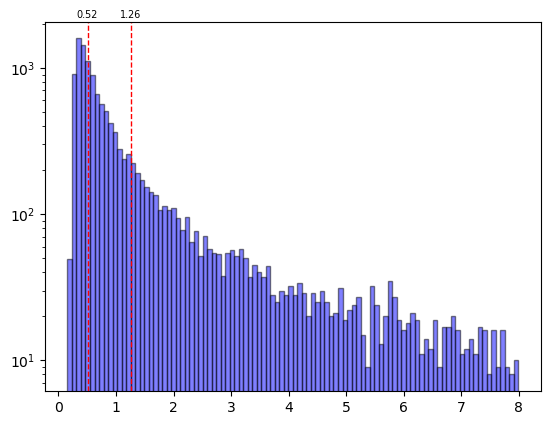

In [87]:
num_bins = 100
plt.hist(filtered['radiance'], bins=num_bins, alpha=0.5, color='b', edgecolor='black')
plt.yscale('log')
plt.axvline(p33, color='r', linestyle='dashed', linewidth=1)
plt.axvline(p66, color='r', linestyle='dashed', linewidth=1)

plt.text(p33-0.2, 2200, "{:.2f}".format(p33), fontsize='x-small')
plt.text(p66-0.2, 2200, "{:.2f}".format(p66), fontsize='x-small')


labels =>  [0 0 0 ... 2 0 0]
[0.15635176 0.9692701  4.0585337 ]


Text(4.0585337, 2500, '4.06')

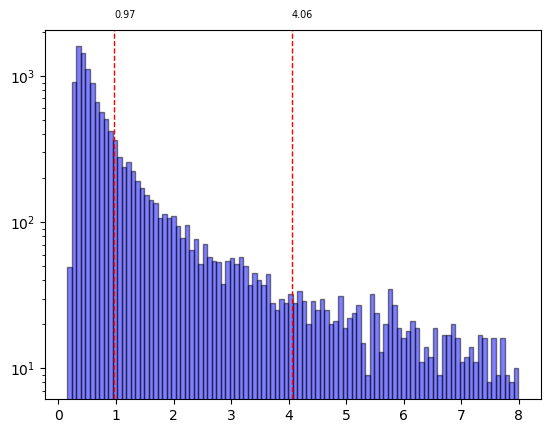

In [73]:
gmm = GaussianMixture(n_components=3)  # n_components define o número de clusters
radiance = np.array(df['radiance']).reshape(-1, 1)
# ajustando o modelo aos dados
gmm.fit(radiance)

# prevendo as classes para cada ponto de dados
labels = gmm.predict(radiance)
print('labels => ', labels)
# separando o array em diferentes clusters
cluster1 = df[labels == 0]
cluster2 = df[labels == 1]
cluster3 = df[labels == 2]

arr = [cluster1.sort_values(by='radiance').iloc[0]['radiance'], cluster2.sort_values(by='radiance').iloc[0]['radiance'], cluster3.sort_values(by='radiance').iloc[0]['radiance']]
arr = np.sort(arr)

print(arr)

num_bins = 100
plt.hist(filtered['radiance'], bins=num_bins, alpha=0.5, color='b', edgecolor='black')
plt.yscale('log')
plt.axvline(arr[1], color='r', linestyle='dashed', linewidth=1)
plt.axvline(arr[2], color='r', linestyle='dashed', linewidth=1)

plt.text(arr[1], 2500, "{:.2f}".format(arr[1]), fontsize='x-small')
plt.text(arr[2], 2500, "{:.2f}".format(arr[2]), fontsize='x-small')

